In [1]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES']='1'

solver = "ECOS"
save_data = False

from kelly_gambling import *
dataset = "kelly"

from osmm import OSMM
import pickle
import datetime

device = cpu


In [2]:
max_num_rounds = 100

In [3]:
alg_props = {    
    "r=0, M=1": [0, 0, 1],
    "r=0, M=20": [1, 0, 20],
    "r=0, M=50": [2, 0, 50],
    "r=20, M=1": [3, 20, 1],
    "r=20, M=20": [4, 20, 20],
    "r=20, M=50": [5, 20, 50],
    "r=50, M=1": [6, 50, 1],
    "r=50, M=20": [7, 50, 20],
    "r=50, M=50": [8, 50, 50],
}
    
num_algs = len(alg_props)

In [4]:
# Define structs:
objfs = np.zeros((num_algs, max_num_rounds))
objfs_validation = np.zeros((num_algs, max_num_rounds))
runtimes = np.zeros((num_algs, max_num_rounds))
iters_takens = np.zeros(num_algs)
damping_facs = np.ones((num_algs, max_num_rounds))
mus = np.ones((num_algs, max_num_rounds))
ts = np.ones((num_algs, max_num_rounds))
Xs = np.zeros((n, num_algs, max_num_rounds))
lower_bounds = np.ones((num_algs, max_num_rounds)) * (-np.inf)
best_xs = np.zeros((n, num_algs))
v_norms = np.zeros((num_algs, max_num_rounds))
num_f_evals = np.zeros((num_algs, max_num_rounds))
rms_residuals = np.zeros((num_algs, max_num_rounds))
q_norms = np.zeros((num_algs, max_num_rounds))
f_grad_norms = np.zeros((num_algs, max_num_rounds))
time_cost_details = np.zeros((5, num_algs, max_num_rounds))
baseline_opt_objf = []
baseline_time_cost = []

In [6]:
print("dataset = %s:" % (dataset))
W = generate_random_data()
W_validation = None
print("End generate data")

dataset = kelly:
End generate data


In [7]:
osmm_prob = OSMM()
osmm_prob.f_torch.function = my_f_torch
osmm_prob.f_torch.W = W
osmm_prob.f_torch.W_validate = W_validation
osmm_prob.g_cvxpy.variable = g_var
osmm_prob.g_cvxpy.objective = g_obj
osmm_prob.g_cvxpy.constraints = g_constr

In [9]:
for alg_name in alg_props:
    print("    " + alg_name + ":")
    alg_idx = alg_props[alg_name][0]
    H_rank = alg_props[alg_name][1]
    M = alg_props[alg_name][2]
        
    osmm_prob.solve(init_val, max_iter=max_num_rounds, 
                    hessian_rank=H_rank, gradient_memory=M,
                    solver=solver, use_termination_criteria=False, verbose=True)

    Xs[:, alg_idx, :] = osmm_prob.method_results["var_iters"]
    objfs[alg_idx, :] = osmm_prob.method_results["objf_iters"]
    objfs_validation[alg_idx, :] = osmm_prob.method_results["objf_validate_iters"]
    lower_bounds[alg_idx, :] = osmm_prob.method_results["lower_bound_iters"]
    damping_facs[alg_idx, :] = osmm_prob.method_results["lam_iters"]
    mus[alg_idx, :] = osmm_prob.method_results["mu_iters"]
    ts[alg_idx, :] = osmm_prob.method_results["t_iters"]
    runtimes[alg_idx, :] = osmm_prob.method_results["time_iters"]
    best_xs[:, alg_idx] = osmm_prob.method_results["soln"]
    v_norms[alg_idx, :] = osmm_prob.method_results["v_norm_iters"]
    num_f_evals[alg_idx, :] = osmm_prob.method_results["num_f_evals_iters"]
    rms_residuals[alg_idx, :] = osmm_prob.method_results["rms_res_iters"]
    f_grad_norms[alg_idx, :] = osmm_prob.method_results["f_grad_norm_iters"]
    q_norms[alg_idx, :] = osmm_prob.method_results["q_norm_iters"]
    time_cost_details[:, alg_idx, :] = osmm_prob.method_results["time_detail_iters"]
    iters_takens[alg_idx] = osmm_prob.method_results["total_iters"]
    print("")

    r=0, M=1:
iter = 10, objf = -8.081e-02, lower bound = -9.011e-02, RMS residual = 1.307e-03, ||G||_F = 0.000e+00
iter = 20, objf = -8.131e-02, lower bound = -8.798e-02, RMS residual = 7.300e-04, ||G||_F = 0.000e+00
iter = 30, objf = -8.175e-02, lower bound = -8.558e-02, RMS residual = 5.802e-04, ||G||_F = 0.000e+00
iter = 40, objf = -8.194e-02, lower bound = -8.343e-02, RMS residual = 5.289e-04, ||G||_F = 0.000e+00
iter = 50, objf = -8.204e-02, lower bound = -8.334e-02, RMS residual = 3.330e-04, ||G||_F = 0.000e+00
iter = 60, objf = -8.210e-02, lower bound = -8.334e-02, RMS residual = 3.893e-04, ||G||_F = 0.000e+00
iter = 70, objf = -8.213e-02, lower bound = -8.263e-02, RMS residual = 1.499e-05, ||G||_F = 0.000e+00
iter = 80, objf = -8.213e-02, lower bound = -8.218e-02, RMS residual = 6.820e-06, ||G||_F = 0.000e+00
iter = 90, objf = -8.213e-02, lower bound = -8.218e-02, RMS residual = 3.525e-06, ||G||_F = 0.000e+00
      Terminated. Num iterations = 99, objf = -8.213e-02, lower boun

/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


iter = 80, objf = -8.213e-02, lower bound = -8.213e-02, RMS residual = 2.680e-06, ||G||_F = 0.000e+00
iter = 90, objf = -8.213e-02, lower bound = -8.213e-02, RMS residual = 3.726e-06, ||G||_F = 0.000e+00
      Terminated. Num iterations = 99, objf = -8.213e-02, lower bound = -8.213e-02, RMS residual = 2.238e-06.
      Time elapsed (secs): 7.129452.


    r=0, M=50:
iter = 10, objf = -8.098e-02, lower bound = -8.684e-02, RMS residual = 2.247e-03, ||G||_F = 0.000e+00
iter = 20, objf = -8.149e-02, lower bound = -8.400e-02, RMS residual = 2.239e-03, ||G||_F = 0.000e+00
iter = 30, objf = -8.193e-02, lower bound = -8.282e-02, RMS residual = 1.286e-03, ||G||_F = 0.000e+00
iter = 40, objf = -8.208e-02, lower bound = -8.229e-02, RMS residual = 5.992e-04, ||G||_F = 0.000e+00
iter = 50, objf = -8.213e-02, lower bound = -8.217e-02, RMS residual = 1.279e-04, ||G||_F = 0.000e+00
iter = 60, objf = -8.213e-02, lower bound = -8.213e-02, RMS residual = 1.991e-05, ||G||_F = 0.000e+00
iter = 70, objf = -8

In [10]:
print("W shape =", W.shape)
_, N = W.shape
print("log10 N =", np.log10(N), ", n =", n)

W shape = (1001, 1000)
log10 N = 3.0 , n = 1000


In [11]:
stuff = {}
stuff["objfs"] = objfs
stuff["objfs_validation"] = objfs_validation
stuff["lower_bounds"] = lower_bounds
stuff["runtimes"] = runtimes
stuff["rms_residuals"] = rms_residuals
stuff["f_grad_norms"] = f_grad_norms
stuff["q_norms"] = q_norms
stuff["damping_facs"] = damping_facs
stuff["ts"] = ts
stuff["Xs"] = Xs
stuff["best_xs"] = best_xs
stuff["v_norms"] = v_norms
stuff["num_f_evals"] = num_f_evals
stuff["iters_takens"] = iters_takens
stuff["time_cost_details"] = time_cost_details
stuff["alg_props"] = list(alg_props.keys())

stuff["baseline_opt_objf"] = baseline_opt_objf
stuff["baseline_time_cost"] = baseline_time_cost
now = datetime.datetime.now()
mmddyyhhmm = ("%d_%d_%d_%d_%d" % (now.month, now.day, now.year, now.hour, now.minute))
part_of_out_fn = dataset + "" + mmddyyhhmm

In [12]:
if save_data:
    pickle.dump(stuff, open("ECOS_data_%s.pkl" % (part_of_out_fn), "wb"))

/Users/xinyueshen/Documents/research/osmm/examples/experiment/kelly_gambling.py:126: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  b.stem([i for i in range(n)], x_best, markerfmt=' ')


mean 0.0821303275274919 1.0855972838202232


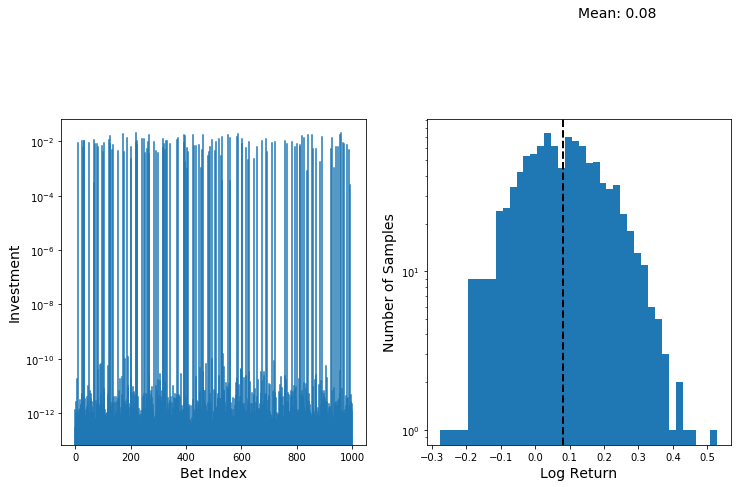

In [13]:
my_plot_one_result(W, best_xs[:, 0])

## timing results

In [14]:
eps_gap_rel = 1e-3
eps_res_abs = 1e-4
eps_res_rel = 1e-3

In [18]:
for alg_idx in range(len(alg_props)):
    stop_iters = [max_num_rounds] * 2
    for i in range(10, max_num_rounds):
        if objfs[alg_idx, i] < np.inf and \
        objfs[alg_idx, i] - lower_bounds[alg_idx, i] <= 1e-4 + eps_gap_rel * np.abs(objfs[alg_idx, i]):
            stop_iters[0] = min(i, stop_iters[0])
        if ts[alg_idx, i] == 1 and \
        rms_residuals[alg_idx, i] <= eps_res_abs + eps_res_rel * (q_norms[alg_idx, i] + f_grad_norms[alg_idx, i]) / np.sqrt(n):
            stop_iters[1] = min(i, stop_iters[1])
        if max(stop_iters) < max_num_rounds:
            break
    print("iteration at which a stopping condition holds", stop_iters)
    stop_iter = min(stop_iters)
    solve_time = np.sum(runtimes[alg_idx, 0:np.min(stop_iters) + 1])
    f_evals = np.mean(num_f_evals[alg_idx, 1:np.min(stop_iters) + 1], axis=0)
    print("alg_idx =", alg_idx, ", solve time (stopping criteria) = ", '{:g}'.format(float('{:.2g}'.format(solve_time))),
    ", iterations=", np.min(stop_iters), ", f evals=", '{:g}'.format(float('{:.2g}'.format(f_evals))))

iteration at which a stopping condition holds [80, 67]
alg_idx = 0 , solve time (stopping criteria) =  2.3 , iterations= 67 , f evals= 5.3
iteration at which a stopping condition holds [60, 53]
alg_idx = 1 , solve time (stopping criteria) =  3.7 , iterations= 53 , f evals= 5
iteration at which a stopping condition holds [44, 67]
alg_idx = 2 , solve time (stopping criteria) =  6.3 , iterations= 44 , f evals= 4.6
iteration at which a stopping condition holds [50, 17]
alg_idx = 3 , solve time (stopping criteria) =  0.85 , iterations= 17 , f evals= 2.1
iteration at which a stopping condition holds [30, 17]
alg_idx = 4 , solve time (stopping criteria) =  1.4 , iterations= 17 , f evals= 2.1
iteration at which a stopping condition holds [20, 18]
alg_idx = 5 , solve time (stopping criteria) =  2.6 , iterations= 18 , f evals= 2
iteration at which a stopping condition holds [30, 20]
alg_idx = 6 , solve time (stopping criteria) =  1.1 , iterations= 20 , f evals= 2.2
iteration at which a stopping 

In [16]:
ep = 1e-6
for alg_idx in range(len(alg_props)):
    subopt = objfs[alg_idx, :] - np.min(objfs[alg_idx, :])
    iter_reach_ep = max_num_rounds
    for i in range(max_num_rounds):
        if subopt[i] <= ep:
            iter_reach_ep = i
            break
    f_evals = np.mean(num_f_evals[alg_idx, 1:iter_reach_ep + 1], axis=0)
    print("iters to reach 1e-6 subopt = ", iter_reach_ep)
    print("solve time to reach 1e-6 subopt = ", np.sum(runtimes[alg_idx, 0:iter_reach_ep + 1]))
    print("f evals", f_evals)

iters to reach 1e-6 subopt =  68
solve time to reach 1e-6 subopt =  2.3495378494262695
f evals 5.3088235294117645
iters to reach 1e-6 subopt =  61
solve time to reach 1e-6 subopt =  4.225165605545044
f evals 4.639344262295082
iters to reach 1e-6 subopt =  53
solve time to reach 1e-6 subopt =  7.490316152572632
f evals 4.39622641509434
iters to reach 1e-6 subopt =  21
solve time to reach 1e-6 subopt =  1.1174595355987549
f evals 2.0
iters to reach 1e-6 subopt =  21
solve time to reach 1e-6 subopt =  1.789325475692749
f evals 2.0
iters to reach 1e-6 subopt =  27
solve time to reach 1e-6 subopt =  4.393423318862915
f evals 2.7777777777777777
iters to reach 1e-6 subopt =  19
solve time to reach 1e-6 subopt =  1.0610125064849854
f evals 2.3157894736842106
iters to reach 1e-6 subopt =  23
solve time to reach 1e-6 subopt =  2.207807779312134
f evals 1.7826086956521738
iters to reach 1e-6 subopt =  24
solve time to reach 1e-6 subopt =  4.34599757194519
f evals 1.6666666666666667


In [17]:
# mean_time_details = np.mean(time_cost_details, axis=3)
print("time cost detail")
print("===============f======grad f====subp====L_k====")
for alg_idx in range(len(alg_props)):
    f_eval = np.mean(time_cost_details[0, alg_idx, 1::])
    f_grad_eval = np.mean(time_cost_details[1, alg_idx, 1::])
    subp_ave = np.mean(time_cost_details[2, alg_idx, 2::])
    subp_first = time_cost_details[2, alg_idx, 1]
    L_k_ave = np.mean(time_cost_details[3, alg_idx, 20:100:10])
    L_k_first = time_cost_details[3, alg_idx, 10]
    print_results = [f_eval, f_grad_eval, subp_ave, L_k_ave]
    print(alg_idx, ['{:g}'.format(float('{:.2g}'.format(print_results[i]))) for i in range(4)])

time cost detail
===============f======grad f====subp====L_k====
0 ['0.0011', '0.001', '0.028', '0.0098']
1 ['0.0024', '0.0011', '0.058', '0.053']
2 ['0.0025', '0.0012', '0.12', '0.29']
3 ['0.0023', '0.0011', '0.059', '0.011']
4 ['0.0023', '0.0012', '0.11', '0.056']
5 ['0.0025', '0.0011', '0.19', '0.35']
6 ['0.0026', '0.0011', '0.085', '0.012']
7 ['0.0025', '0.0013', '0.16', '0.056']
8 ['0.0025', '0.0011', '0.27', '0.23']
